# Задача 1. Преобразование треугольника
1) Задать треугольник точками и матрицей их однородных координат
2) Построить образ треугольника при
- переносе $T_{\overrightarrow{a}}$
- повороте $R_{o}^{\phi}$
- отражении $S_l$
- гомотетии $H_o^k$
(Параметры задать самостоятельно)
- композиции гомотетии относительно середины какой-либо стороны и поворота на 180 градусов
# Задача 2. Преобразование квадрата
1) Задать квадрат точками и матрицей однородных координат
2) Найти преобразование, переводящее квадрат в параллелограмм, смещенной так, чтобы не пересекаться с квадратом
3) Найти матрицу обратного преобразования


# Выполнение задачи 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Координаты вершин
triangle = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1]
], dtype=float)

# Общий метод для преобразования
def apply_transformation(points, M):
    transformed = (M @ points.T).T # привычка СПбшников - столбцы
    return transformed

# Общий метод для отрисовки треугольника
def plot_triangle(ax, points, style='b-', label=''):
    closure = np.vstack([points, points[0]])
    ax.plot(closure[:, 0], closure[:, 1], style, label=label)

# Рисуем треугольники
def draw_triangles(original, transformed, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_triangle(ax, original, style='b-', label='Исходный треугольник')
    plot_triangle(ax, transformed, style='r--', label='Преобразованный треугольник')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    plt.show()

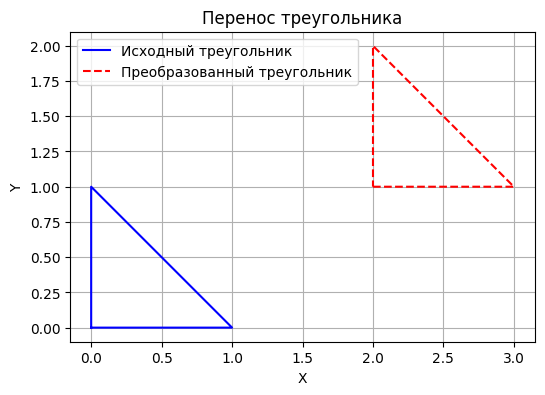

In [2]:
# Перенос

tx, ty = 2, 1
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
triangle_translated = apply_transformation(triangle, translation_matrix)

draw_triangles(triangle, triangle_translated, 'Перенос треугольника')

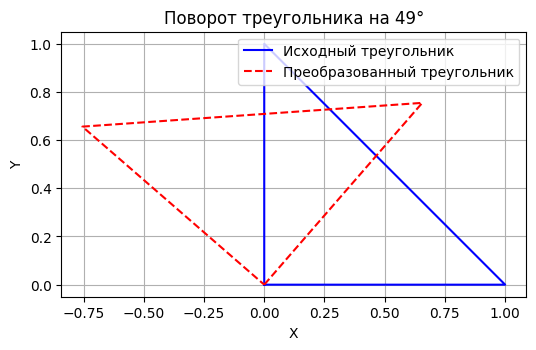

In [3]:
# Поворот
angle_degrees = 49
angle_radians = np.radians(angle_degrees)

rotation_matrix = np.array([
    [np.cos(angle_radians), -np.sin(angle_radians), 0],
    [np.sin(angle_radians),  np.cos(angle_radians), 0],
    [0,                     0,                      1]
])

triangle_rotated = apply_transformation(triangle, rotation_matrix)

draw_triangles(triangle, triangle_rotated, f'Поворот треугольника на {angle_degrees}°')

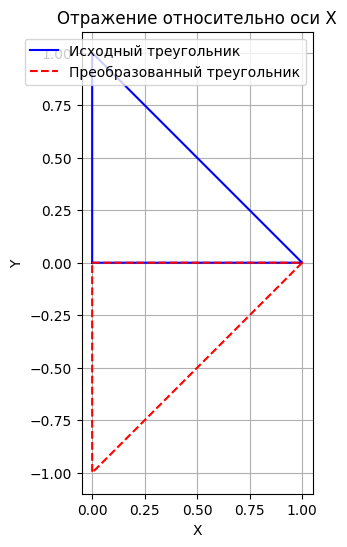

In [4]:
# Отражение треугольника относительно оси OX:

reflection_matrix_x = np.array([
    [1,  0, 0],
    [0, -1, 0], # Инвертируем y, x остается таким же
    [0,  0, 1]
])
triangle_reflected_x = apply_transformation(triangle, reflection_matrix_x)
draw_triangles(triangle, triangle_reflected_x, 'Отражение относительно оси X')

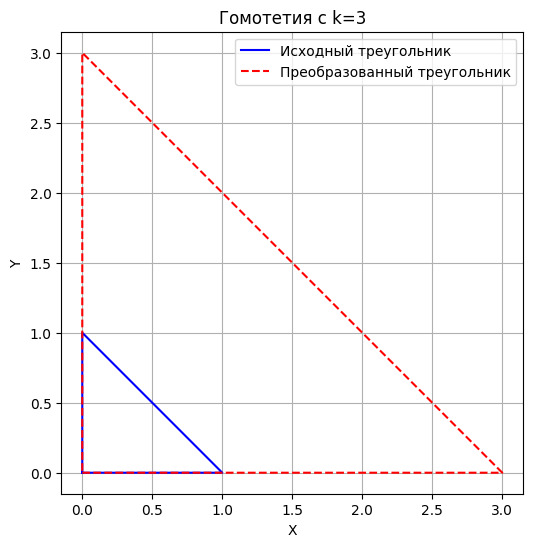

In [5]:
# Гомотетия относительно начала координат (0,0) с коэффициентом k=3
k = 3
homothety_matrix = np.array([
    [k,  0,  0],
    [0,  k,  0], # Просто домножаем x, y
    [0,  0,  1]
])
triangle_homothetic = apply_transformation(triangle, homothety_matrix)
draw_triangles(triangle, triangle_homothetic, f'Гомотетия с k={k}')

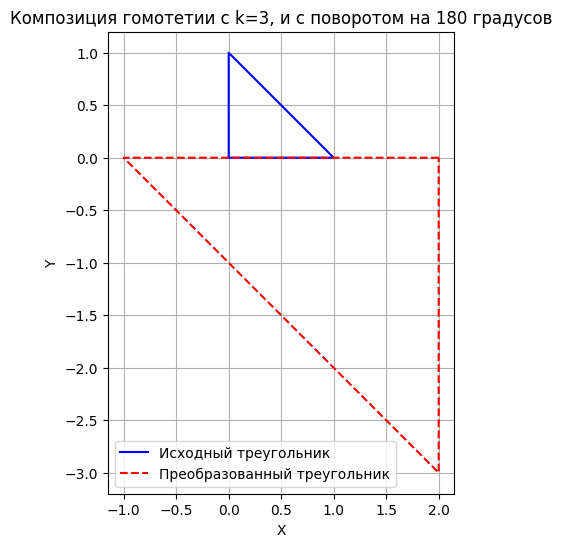

In [10]:
# Композиция гомотетии и поворота на 180 градусов

# Вычисляем середину стороны AB треугольника
M = (triangle[0] + triangle[1]) / 2

# Коэффициент гомотетии
k = 3

translation_matrix = np.array([
    [1, 0, M[0]],
    [0, 1, M[1]],
    [0, 0, 1]
])

translation_matrix_minus = np.array([
    [1, 0, -M[0]],
    [0, 1, -M[1]],
    [0, 0, 1]
])

homothety_matrix = np.array([
    [k,  0,  0], # Масштабируем x и добавляем сдвиг для компенсации
    [0,  k, 0], # Масштабируем y и добавляем сдвиг для компенсации
    [0,  0,  1]              
])

angle_degrees = 180
angle_radians = np.radians(angle_degrees)
rotation_matrix = np.array([
    [np.cos(angle_radians), -np.sin(angle_radians), 0], # Поворот x и сдвиг для компенсации
    [np.sin(angle_radians),  np.cos(angle_radians), 0], # Поворот y и сдвиг для компенсации
    [0,                     0,                      1]       
])

composition_matrix = translation_matrix @ homothety_matrix @ translation_matrix_minus @ translation_matrix @ rotation_matrix @ translation_matrix_minus
triangle_composition = apply_transformation(triangle, composition_matrix)
draw_triangles(triangle, triangle_composition, f'Композиция гомотетии с k={k}, и с поворотом на 180 градусов')

# Выполнение задачи 2

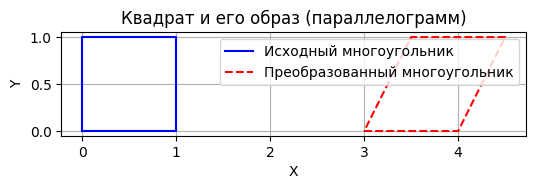

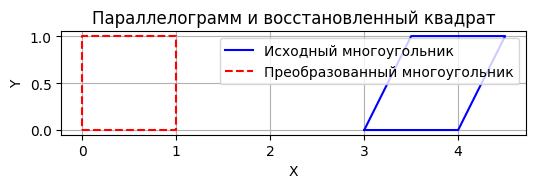

In [29]:
# см. тетрадь для матриц
# Мысль: поставим основание квадрата по оси OX
# Используем сдвиг + перенос.
# Сдвиг сдвинет лишь "крышу" квадрата,
# А перенос обеспечит то, что квадрат и параллелограмм не будут пересекаться

def plot_polygon(ax, points, style='b-', label=''):
    closure = np.vstack([points, points[0]])
    ax.plot(closure[:, 0], closure[:, 1], style, label=label)

def draw_polygons(original, transformed, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_polygon(ax, original, 'b-', label='Исходный многоугольник')
    plot_polygon(ax, transformed, 'r--', label='Преобразованный многоугольник')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    plt.show()


square = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
], dtype=float)


k = 0.5
tx = 3.0
ty = 0.0

transformation_matrix = np.array([
    [1.0,  k,   tx],
    [0.0, 1.0,  ty],
    [0.0, 0.0, 1.0]
])

parallelogram = apply_transformation(square, transformation_matrix)
draw_polygons(square, parallelogram, "Квадрат и его образ (параллелограмм)")

inverse_matrix = np.array([
    [1.0,  -k,   k*ty - tx],
    [0.0,  1.0,  -ty],
    [0.0,  0.0,   1.0] # см. тетрадь
])

square_restored = apply_transformation(parallelogram, inverse_matrix)
draw_polygons(parallelogram, square_restored, "Параллелограмм и восстановленный квадрат")